<a href="https://colab.research.google.com/github/ramu11/PyTorch_ML_Models/blob/main/K_Nearest_Neighbors_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Here we implement K-Means clustering in python with random data

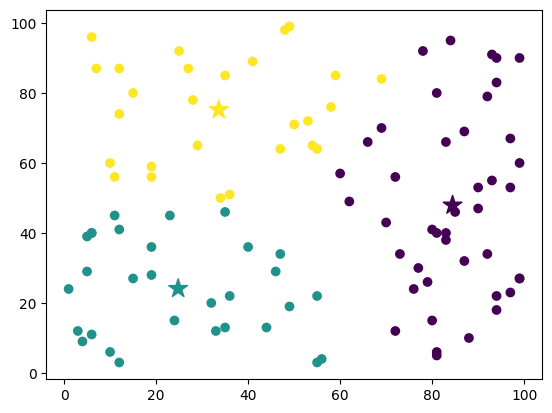

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

class KMeansClustering:

    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((np.array(data_point) - np.array(centroids)) ** 2, axis=1))

    def fit(self, X, max_iterations=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), (self.k, X.shape[1]))

        for _ in range(max_iterations):
          y= []
          for data_point in X:
            # calculate the distance b/w data points and centroid
              distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
              # get the index of the smallest centroid to the data_point
              clusetr_num = np.argmin(distances)
              y.append(clusetr_num) # ys is kind of label or class

          y = np.array(y)

          # Re adjust the centroids based on labels(y)
          cluster_indices = [] # list of lists ( no of clusters , data points in each cluster)

          for i in range(self.k): # k is no of clusters
            cluster_indices.append(np.argwhere(y == i))
            #print(f"labels: {y}")
            cluster_centers = []
            for i, indices in enumerate (cluster_indices):
              if len(indices) == 0:
                 cluster_centers.append(self.centroids[i]) # sets the current centroid
              else:
                cluster_centers.append(np.mean(X[indices], axis=0)[0])

          if(np.max(self.centroids - np.array(cluster_centers)) < 0.0001):
             break
          else:
              self.centroids=np.array(cluster_centers)

        return y

random_points = np.random.randint(0, 100, (100,2))

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:,0], random_points[:,1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c=range(len(kmeans.centroids)), marker="*", s=200)
plt.show()







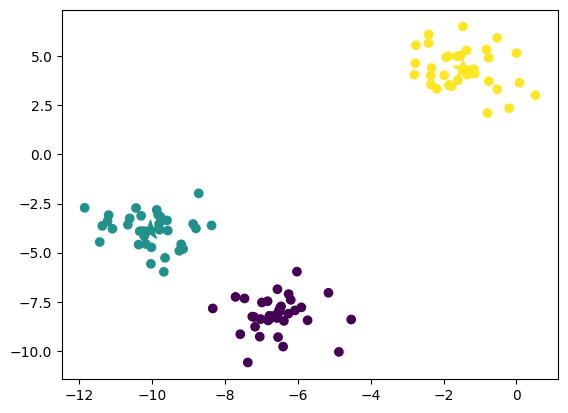

In [ ]:
# try with sklearn data blobs
from sklearn.datasets import make_blobs

random_points, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1)
#random_points[0]

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

plt.scatter(random_points[:,0], random_points[:,1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c=range(len(kmeans.centroids)), marker="*", s=200)
plt.show()


